# Scipy solve_ivp example for 2<sup>nd</sup> order ordinary differential equation

### Modelled system

The modelled system is a particle with acceleration

\begin{align*}
\frac{d^2x}{dt^2} = a \cdot \frac{dx}{dt} -b \cdot x
\end{align*}

where $a,b \in \mathbb{R}$, x is the particle position and t is time. We will solve this ODE in the domain $t \in [0, 50] $. Further, the initial conditions are that

\begin{align*}
x(t=0) &= 0 \\
\frac{dx (t=0)}{dt} &= 0.1 \frac{m}{s}
\end{align*}

**This form is later referred to system (1) in this notebook.**

This system has an analytical solution

\begin{align*}
x(t) = c_1 e^{(1/2 t (a - \sqrt{a^2 - 4 b}))} + c_2 e^{(1/2 t (\sqrt{a^2 - 4 b} + a))}
\end{align*}

With our chosen initial conditions this becomes

\begin{align*}
x(t) = \frac{0.1 e^{(1/2 t (\sqrt{a^2 - 4 b} + a))} - 0.1 e^{(1/2 t (a - \sqrt{a^2 - 4 b}))}}{\sqrt{a^2 - 4 b}}
\end{align*}


### Conversion to first order system

To solve ODE (1) with solve_ivp we need to convert the system back to first order system. This can be done by setting

\begin{align*}
y_1 &= x \\
y_2 &= \frac{dx}{dt}
\end{align*}

and the system (1) becomes

\begin{align*}
\frac{dy_2}{dt} &= a \cdot y_2 - b \cdot y_1 \\
\frac{dy_1}{dt} &= y_2
\end{align*}

which will be referred to as system (2) and solved with solve_ivp in the following cells




In [1]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
%matplotlib widget

### Set constants

In [2]:
a = 0.041
b = 0.0001
params = {}
params['a'] = a
params['b'] = b

### Calculate analytical solution

In [3]:
t = np.linspace(0,50,101)
x_exact = (0.1*np.exp(0.5*t*(np.sqrt(a**2-4*b)+a)) - 0.1*np.exp(0.5*t*(a-np.sqrt(a**2-4*b))))/(np.sqrt(a**2-4*b))

### Calculate numerical solution

#### Define ode function

Now the returned function dydt contains two values where the first element is $\frac{dy_1}{dt}$ and the second element is $\frac{dy_2}{dt}$

In [4]:
def odefun(t,y,params):
    dydt = np.zeros((2,))
    dydt[0] = y[1]
    dydt[1] = params['a'] * y[1] - params['b']*y[0]
    return dydt 

#### Use solve_ivp to calculate $y_1$ and $y_2$
Setting monotonically increasing array in t_eval gives more solution points

In [5]:
t_start = 0
t_end = 50
y_init = [0, 0.1]
solution = solve_ivp(lambda t,y: odefun(t,y,params), (t_start,t_end), y_init,t_eval=t, method='DOP853')

In [6]:
solution

  message: 'The solver successfully reached the end of the integration interval.'
     nfev: 74
     njev: 0
      nlu: 0
      sol: None
   status: 0
  success: True
        t: array([ 0. ,  0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5,  5. ,
        5.5,  6. ,  6.5,  7. ,  7.5,  8. ,  8.5,  9. ,  9.5, 10. , 10.5,
       11. , 11.5, 12. , 12.5, 13. , 13.5, 14. , 14.5, 15. , 15.5, 16. ,
       16.5, 17. , 17.5, 18. , 18.5, 19. , 19.5, 20. , 20.5, 21. , 21.5,
       22. , 22.5, 23. , 23.5, 24. , 24.5, 25. , 25.5, 26. , 26.5, 27. ,
       27.5, 28. , 28.5, 29. , 29.5, 30. , 30.5, 31. , 31.5, 32. , 32.5,
       33. , 33.5, 34. , 34.5, 35. , 35.5, 36. , 36.5, 37. , 37.5, 38. ,
       38.5, 39. , 39.5, 40. , 40.5, 41. , 41.5, 42. , 42.5, 43. , 43.5,
       44. , 44.5, 45. , 45.5, 46. , 46.5, 47. , 47.5, 48. , 48.5, 49. ,
       49.5, 50. ])
 t_events: None
        y: array([[ 0.        ,  0.05051581,  0.1020766 ,  0.15470273,  0.20841491,
         0.26323429,  0.31918242,  0.37628127

### Visualize solution

(0.0, 15.870841076628972)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
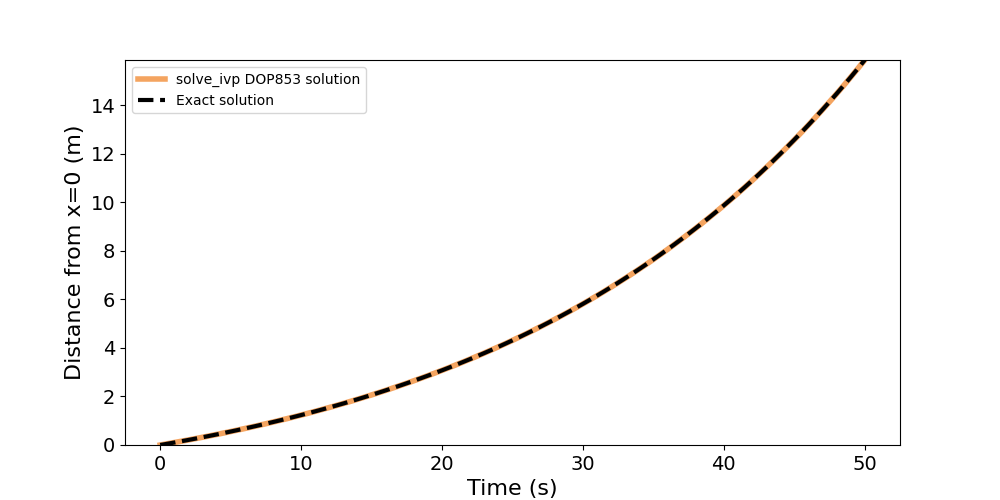

In [7]:
fig, ax = plt.subplots(figsize=(10,5))

ax.plot(solution.t, solution.y[0, :], '-', linewidth=4, color='sandybrown', label='solve_ivp DOP853 solution')
ax.plot(t, x_exact, '--', linewidth=3, color='black', label='Exact solution')
ax.legend()
ax.set_xlabel('Time (s)', fontsize=16)
ax.set_ylabel('Distance from x=0 (m)', fontsize=16)
ax.tick_params(axis='both', labelsize=14)
ax.set_ylim([np.min(solution.y), np.max(solution.y)])